Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, 
чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 30) # показывать больше колонок

In [2]:
students = pd.read_csv('stud_math.csv')

In [3]:
display(students)
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
for col in students.columns: # найдем процент пропусков по колонкам
    pct_missing = np.mean(students[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

school - 0%
sex - 0%
age - 0%
address - 4%
famsize - 7%
Pstatus - 11%
Medu - 1%
Fedu - 6%
Mjob - 5%
Fjob - 9%
reason - 4%
guardian - 8%
traveltime - 7%
studytime - 2%
failures - 6%
schoolsup - 2%
famsup - 10%
paid - 10%
activities - 4%
nursery - 4%
studytime, granular - 2%
higher - 5%
internet - 9%
romantic - 8%
famrel - 7%
freetime - 3%
goout - 2%
health - 4%
absences - 3%
score - 2%


In [5]:
students.drop(['studytime, granular'], inplace = True, axis = 1) 
# этот столбец нам не нужен для анализа

### Просмотр колонки 1 school — аббревиатура школы, в которой учится ученик

In [6]:
pd.DataFrame(students.school.value_counts()) 
#в выборке большой перевес учеников из одной школы: 12% MS против 88% GP, но удалять ее не будем, т.к. если ученики
#школы MS окажутся более подготовлены, школу можно сменить (в отличии от пола и возраста)

,school
GP,349
MS,46


### Просмотр колонки 2 sex — пол ученика ('F' - женский, 'M' - мужской)

In [7]:
pd.DataFrame(students.sex.value_counts()) 

,sex
F,208
M,187


In [8]:
students.drop(['sex'], inplace = True, axis = 1) 
# пол ученика на уровень подготовки не влияет, поэтому этот столбец нам не нужен для анализа

### Просмотр колонки 3 age — возраст ученика (от 15 до 22)

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

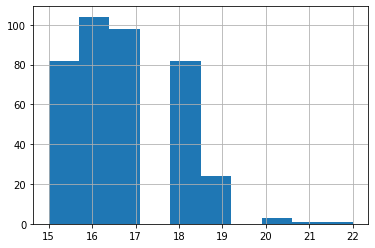

In [9]:
students.age.hist()
students.age.describe()
# вся выборка помещается в заявленный интервал (с 15 до 22), выброс (один студент 22-х лет) картину не испортит

In [10]:
students.drop(['age'], inplace = True, axis = 1) 
# возраст ученика на уровень подготовки не влияет, поэтому этот столбец нам не нужен для анализа

### Просмотр колонки 4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

In [11]:
#меняем пропущенное значение на None
students.address = students.address.astype(str).apply(lambda x: None if x.strip() == '' else x)
students.address = students.address.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' or x == 'NaN'
                                          else x if '(' not in x else x[:x.find('(')].strip())

In [12]:
pd.DataFrame(students.address.value_counts(dropna=False))

,address
U,295
R,83
NaN,17


### Просмотр колонки 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

In [13]:
#меняем пропущенное значение на None
students.famsize = students.famsize.astype(str).apply(lambda x: None if x.strip() == '' else x)
students.famsize = students.famsize.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' or x == 'NaN'
                                          else x if '(' not in x else x[:x.find('(')].strip())

In [14]:
pd.DataFrame(students.famsize.value_counts(dropna=False)) 

,famsize
GT3,261
LE3,107
NaN,27


### Просмотр колонки 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [15]:
#меняем пропущенное значение на None
students.Pstatus = students.Pstatus.astype(str).apply(lambda x: None if x.strip() == '' else x)
students.Pstatus = students.Pstatus.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' or x == 'NaN'
                                          else x if '(' not in x else x[:x.find('(')].strip())

In [16]:
pd.DataFrame(students.Pstatus.value_counts(dropna=False))

,Pstatus
T,314
NaN,45
A,36


### Просмотр колонки 7 Medu — образование матери (0 - нет, 1 - 4 класса,  2 - 5-9 классы,     3 - среднее специальное или 11 классов, 4 - высшее)

In [17]:
students.Medu = students.Medu.fillna(students.Medu.median()) #заменяем отсутствующие значения на медиану

In [18]:
pd.DataFrame(students.Medu.value_counts(dropna=False))

,Medu
4.0,131
2.0,102
3.0,100
1.0,59
0.0,3


count    395.000000
mean       2.751899
std        1.094154
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

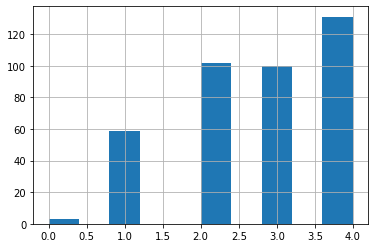

In [19]:
students.Medu.hist()
students.Medu.describe()

### Просмотр колонки 8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [20]:
pd.DataFrame(students.Fedu.value_counts(dropna=False)) # показатель 40,0 - ошибка и неясно какой уровень образования: 4 или 0

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
NaN,24
0.0,2
40.0,1


In [21]:
students.drop([11], inplace = True, axis = 0) # удаление строки с ошибкой

In [22]:
students.Fedu = students.Fedu.fillna(students.Fedu.median()) #заменяем отсутствующие значения на медиану

count    394.000000
mean       2.482234
std        1.060961
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

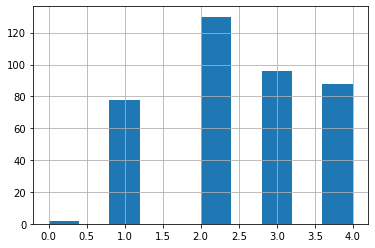

In [23]:
students.Fedu.hist()
students.Fedu.describe()

### Просмотр колонки 9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [24]:
#меняем пропущенное значение на None
students.Mjob = students.Mjob.astype(str).apply(lambda x: None if x.strip() == '' else x)
students.Mjob = students.Mjob.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' or x == 'NaN'
                                          else x if '(' not in x else x[:x.find('(')].strip())

In [25]:
pd.DataFrame(students.Mjob.value_counts(dropna=False))

,Mjob
other,133
services,97
at_home,58
teacher,55
health,32
NaN,19


count       375
unique        5
top       other
freq        133
Name: Mjob, dtype: object

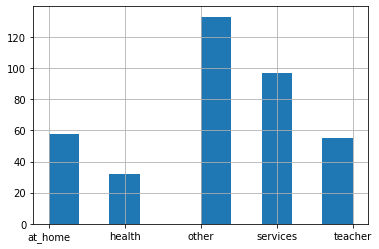

In [26]:
students.Mjob.hist()
students.Mjob.describe()

### Просмотр колонки 10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [27]:
#меняем пропущенное значение на None
students.Fjob = students.Fjob.astype(str).apply(lambda x: None if x.strip() == '' else x)
students.Fjob = students.Fjob.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' or x == 'NaN'
                                          else x if '(' not in x else x[:x.find('(')].strip())

In [28]:
pd.DataFrame(students.Mjob.value_counts(dropna=False))

,Mjob
other,133
services,97
at_home,58
teacher,55
health,32
NaN,19


count       358
unique        5
top       other
freq        196
Name: Fjob, dtype: object

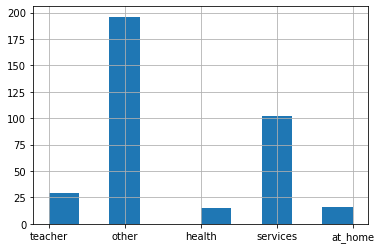

In [29]:
students.Fjob.hist()
students.Fjob.describe()

### Просмотр колонки 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [30]:
#меняем пропущенное значение на None
students.reason = students.reason.astype(str).apply(lambda x: None if x.strip() == '' else x)
students.reason = students.reason.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' or x == 'NaN'
                                          else x if '(' not in x else x[:x.find('(')].strip())

In [31]:
pd.DataFrame(students.reason.value_counts())

,reason
course,137
home,104
reputation,102
other,34


In [32]:
students.loc[students['reason'] == 'None', 'reason'] = 'other'# пропуски заменим на прочее

### Просмотр колонки 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [33]:
#меняем пропущенное значение на None
students.guardian = students.guardian.astype(str).apply(lambda x: None if x.strip() == '' else x)
students.guardian = students.guardian.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' or x == 'NaN'
                                          else x if '(' not in x else x[:x.find('(')].strip())

In [34]:
pd.DataFrame(students.guardian.value_counts(dropna=False))

,guardian
mother,250
father,85
NaN,31
other,28


### Просмотр колонки 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [35]:
students.traveltime = students.traveltime.fillna(students.traveltime.median()) #заменяем отсутствующие значения на медиану

In [36]:
pd.DataFrame(students.traveltime.value_counts(dropna=False))

,traveltime
1.0,270
2.0,96
3.0,21
4.0,7


### Просмотр колонки 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [37]:
students.studytime = students.studytime.fillna(students.studytime.median()) #заменяем отсутствующие значения на медиану

In [38]:
pd.DataFrame(students.studytime.value_counts(dropna=False))

,studytime
2.0,201
1.0,103
3.0,63
4.0,27


### Просмотр колонки 15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [39]:
students.failures = students.failures.fillna(students.failures.median()) #заменяем отсутствующие значения на медиану

In [40]:
pd.DataFrame(students.failures.value_counts(dropna=False))

,failures
0.0,314
1.0,49
2.0,16
3.0,15


### Просмотр колонки 16 schoolsup — дополнительная образовательная поддержка (yes или no)

In [41]:
#меняем пропущенное значение на None
students.schoolsup = students.schoolsup.astype(str).apply(lambda x: None if x.strip() == '' else x)
students.schoolsup = students.schoolsup.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' or x == 'NaN'
                                          else x if '(' not in x else x[:x.find('(')].strip())

In [42]:
pd.DataFrame(students.schoolsup.value_counts(dropna=False))

,schoolsup
no,334
yes,51
NaN,9


### Просмотр колонки 17 famsup — семейная образовательная поддержка (yes или no)

In [43]:
#меняем пропущенное значение на None
students.famsup = students.famsup.astype(str).apply(lambda x: None if x.strip() == '' else x)
students.famsup = students.famsup.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' or x == 'NaN'
                                          else x if '(' not in x else x[:x.find('(')].strip())

In [44]:
pd.DataFrame(students.famsup.value_counts(dropna=False))

,famsup
yes,218
no,137
NaN,39


### Просмотр колонки 18 paid — дополнительные платные занятия по математике (yes или no)

In [45]:
#меняем пропущенное значение на None
students.paid = students.paid.astype(str).apply(lambda x: None if x.strip() == '' else x)
students.paid = students.paid.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' or x == 'NaN'
                                          else x if '(' not in x else x[:x.find('(')].strip())

In [46]:
pd.DataFrame(students.paid.value_counts(dropna=False))

,paid
no,199
yes,155
NaN,40


### Просмотр колонки 19 activities — дополнительные внеучебные занятия (yes или no)

In [47]:
#меняем пропущенное значение на None
students.activities = students.activities.astype(str).apply(lambda x: None if x.strip() == '' else x)
students.activities = students.activities.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' or x == 'NaN'
                                          else x if '(' not in x else x[:x.find('(')].strip())

In [48]:
pd.DataFrame(students.activities.value_counts(dropna=False))

,activities
yes,194
no,186
NaN,14


### Просмотр колонки 20 nursery — посещал детский сад (yes или no)

In [49]:
#меняем пропущенное значение на None
students.nursery = students.nursery.astype(str).apply(lambda x: None if x.strip() == '' else x)
students.nursery = students.nursery.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' or x == 'NaN'
                                          else x if '(' not in x else x[:x.find('(')].strip())

In [50]:
pd.DataFrame(students.activities.value_counts(dropna=False))

,activities
yes,194
no,186
NaN,14


### Просмотр колонки 21 higher — хочет получить высшее образование (yes или no)

In [51]:
#меняем пропущенное значение на None
students.higher = students.higher.astype(str).apply(lambda x: None if x.strip() == '' else x)
students.higher = students.higher.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' or x == 'NaN'
                                          else x if '(' not in x else x[:x.find('(')].strip())

In [52]:
pd.DataFrame(students.higher.value_counts(dropna=False))

,higher
yes,355
NaN,20
no,19


### Просмотр колонки 22 internet — наличие интернета дома (yes или no)

In [53]:
#меняем пропущенное значение на None
students.internet = students.internet.astype(str).apply(lambda x: None if x.strip() == '' else x)
students.internet = students.internet.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' or x == 'NaN'
                                          else x if '(' not in x else x[:x.find('(')].strip())

In [54]:
pd.DataFrame(students.internet.value_counts(dropna=False))

,internet
yes,304
no,56
NaN,34


### Просмотр колонки 23 romantic — в романтических отношениях (yes или no)

In [55]:
#меняем пропущенное значение на None
students.romantic = students.romantic.astype(str).apply(lambda x: None if x.strip() == '' else x)
students.romantic = students.romantic.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' or x == 'NaN'
                                          else x if '(' not in x else x[:x.find('(')].strip())

In [56]:
pd.DataFrame(students.romantic.value_counts(dropna=False))

,romantic
no,239
yes,124
NaN,31


### Просмотр колонки 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [57]:
pd.DataFrame(students.famrel.value_counts(dropna=False))

,famrel
4.0,182
5.0,98
3.0,62
NaN,27
2.0,17
1.0,7
-1.0,1


In [58]:
students[(students.famrel == '-1.0')] 

,school,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


In [59]:
students.drop([25], inplace = True, axis = 0) #удаляем строку с ошибкой

In [60]:
students.famrel = students.famrel.fillna(students.famrel.median()) #заменяем отсутствующие значения на медиану

### Просмотр колонки 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [61]:
students.freetime = students.freetime.fillna(students.freetime.median()) #заменяем отсутствующие значения на медиану

In [62]:
pd.DataFrame(students.freetime.value_counts(dropna=False))

,freetime
3.0,164
4.0,112
2.0,61
5.0,38
1.0,18


### Просмотр колонки 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [63]:
students.goout = students.goout.fillna(students.goout.median()) #заменяем отсутствующие значения на медиану

In [64]:
pd.DataFrame(students.goout.value_counts(dropna=False))

,goout
3.0,135
2.0,99
4.0,84
5.0,52
1.0,23


### Просмотр колонки 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [65]:
students.health = students.health.fillna(students.health.median()) #заменяем отсутствующие значения на медиану

In [66]:
pd.DataFrame(students.health.value_counts(dropna=False))

,health
5.0,137
3.0,89
4.0,77
1.0,47
2.0,43


### Просмотр колонки 28 absences — количество пропущенных занятий

In [67]:
students.absences = students.absences.fillna(students.absences.median()) #заменяем отсутствующие значения на медиану

### Просмотр колонки 29 score — баллы по госэкзамену по математике

In [68]:
pd.DataFrame(students.score.sort_values(ascending=False))

,score
47,100.0
8,95.0
113,95.0
110,95.0
286,95.0
...,...
244,NaN
270,NaN
283,NaN
312,NaN


In [69]:
students.score = students.score.dropna() # удаляем пустые строки, т.к. они неинформативны

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


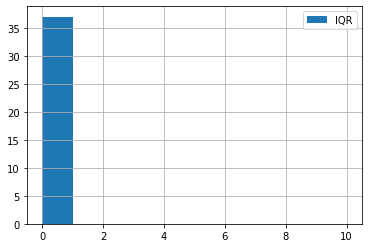

In [70]:
IQR = students.score.quantile(0.75) - students.score.quantile(0.25)
perc25 = students.score.quantile(0.25)
perc75 = students.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
students.score.loc[students.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

In [71]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      393 non-null    object 
 1   address     376 non-null    object 
 2   famsize     366 non-null    object 
 3   Pstatus     350 non-null    object 
 4   Medu        393 non-null    float64
 5   Fedu        393 non-null    float64
 6   Mjob        374 non-null    object 
 7   Fjob        357 non-null    object 
 8   reason      376 non-null    object 
 9   guardian    362 non-null    object 
 10  traveltime  393 non-null    float64
 11  studytime   393 non-null    float64
 12  failures    393 non-null    float64
 13  schoolsup   384 non-null    object 
 14  famsup      354 non-null    object 
 15  paid        353 non-null    object 
 16  activities  379 non-null    object 
 17  nursery     377 non-null    object 
 18  higher      373 non-null    object 
 19  internet    359 non-null    o

##                             Анализ успеваемости студентов

### Корреляционный анализ

In [73]:
students_float = students.drop(['address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
                                'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'], axis=1)
#удаляем строковые значения для удобства анализа численных показателей

In [74]:
students_float

,school,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
0,GP,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,2.0,2.0,1.0,2.0,2.0,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,3.0,1.0,2.0,1.0,0.0,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,3.0,2.0,3.0,1.0,0.0,4.0,4.0,1.0,5.0,0.0,50.0


In [75]:
students_float.corr()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
Medu,1.000000,0.597232,-0.159198,0.077266,-0.243840,-0.017976,0.021943,0.060083,-0.048697,-0.010717,0.209776
Fedu,0.597232,1.000000,-0.131180,0.002156,-0.258991,-0.032989,-0.026969,0.041776,0.006190,0.022250,0.123371
traveltime,-0.159198,-0.131180,1.000000,-0.104561,0.056616,-0.032122,-0.007010,0.056795,-0.045614,-0.037530,-0.059898
studytime,0.077266,0.002156,-0.104561,1.000000,-0.159716,0.023923,-0.120221,-0.051642,-0.071670,-0.024377,0.112063
failures,-0.243840,-0.258991,0.056616,-0.159716,1.000000,0.004081,0.101929,0.119580,0.070597,0.053744,-0.336243
famrel,-0.017976,-0.032989,-0.032122,0.023923,0.004081,1.000000,0.161705,0.070013,0.095749,-0.078306,0.048037
freetime,0.021943,-0.026969,-0.007010,-0.120221,0.101929,0.161705,1.000000,0.287815,0.065335,0.007476,0.016923
goout,0.060083,0.041776,0.056795,-0.051642,0.119580,0.070013,0.287815,1.000000,-0.010786,-0.049476,-0.128639
health,-0.048697,0.006190,-0.045614,-0.071670,0.070597,0.095749,0.065335,-0.010786,1.000000,-0.018077,-0.072190
absences,-0.010717,0.022250,-0.037530,-0.024377,0.053744,-0.078306,0.007476,-0.049476,-0.018077,1.000000,0.063205


### Анализ номинативных переменных

In [76]:
students_object = students.drop(['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout',
                                 'health', 'absences'], axis=1)
#удаляем численные значения (кроме score) для удобства анализа номинативных показателей

In [77]:
students_object

,school,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,score
0,GP,U,None,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,None,no,30.0
1,GP,U,GT3,None,at_home,other,course,father,no,yes,no,no,no,yes,yes,no,30.0
2,GP,U,LE3,T,at_home,other,other,mother,yes,no,None,no,yes,yes,yes,None,50.0
3,GP,U,GT3,T,health,None,home,mother,no,yes,yes,yes,yes,yes,yes,yes,75.0
4,GP,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,U,LE3,A,services,services,course,None,no,yes,yes,no,yes,yes,no,no,45.0
391,MS,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no,80.0
392,MS,R,GT3,T,other,other,course,None,None,no,no,no,no,None,no,no,35.0
393,MS,R,LE3,T,services,other,course,mother,no,no,no,None,no,yes,yes,no,50.0


In [82]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=students_object.loc[students_object.loc[:, column].isin(students_object.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

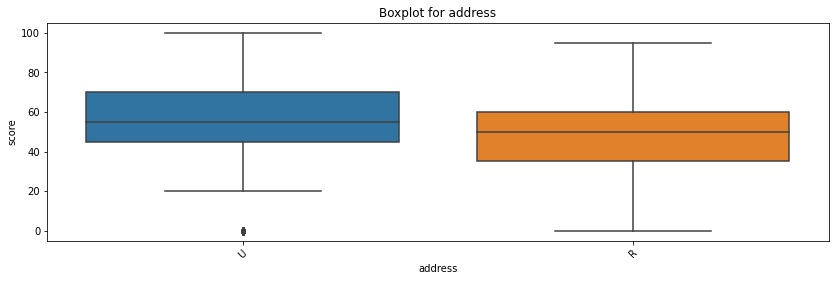

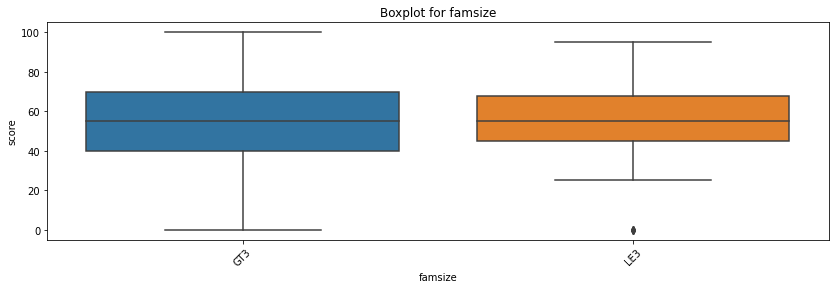

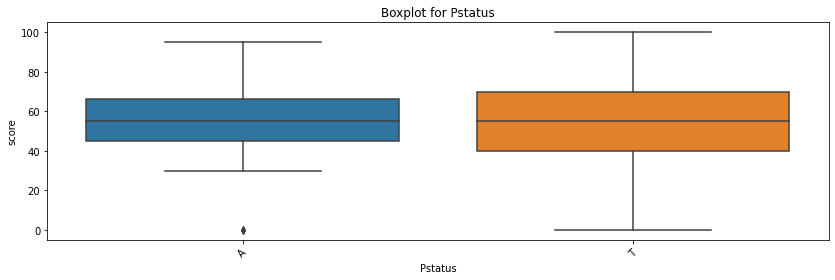

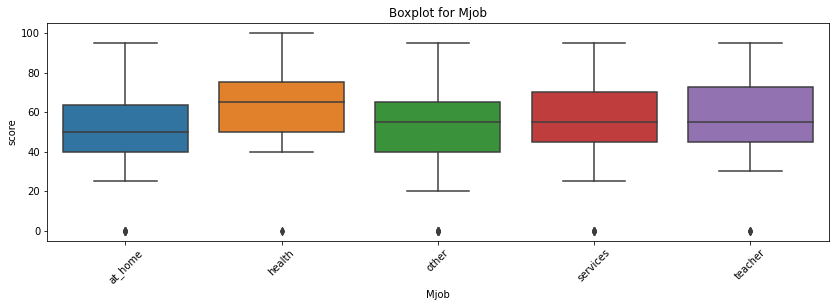

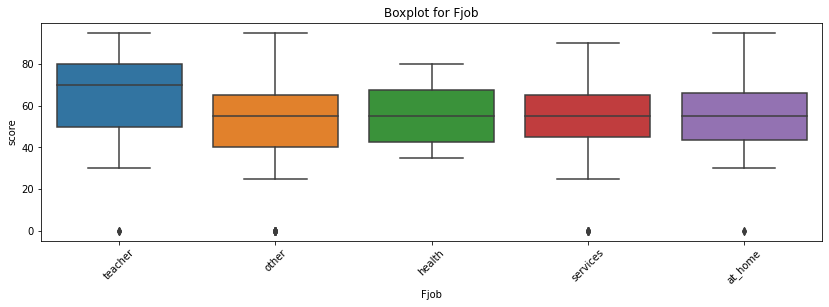

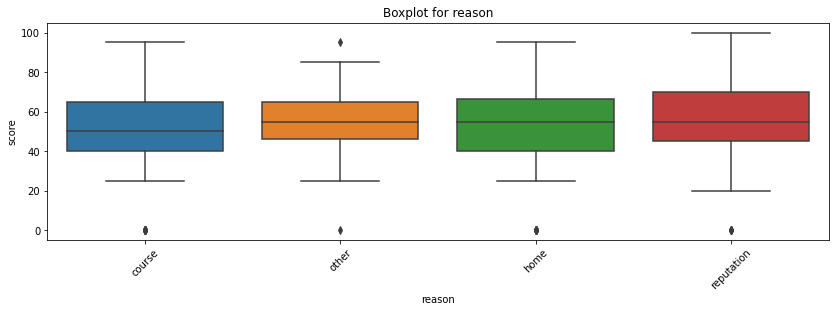

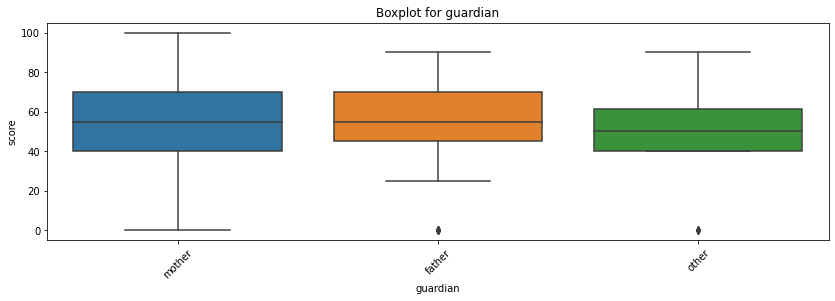

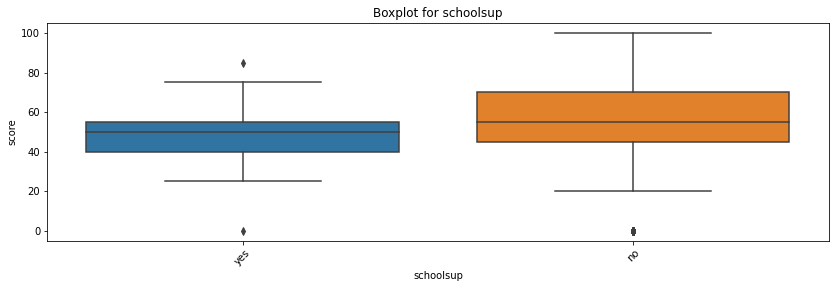

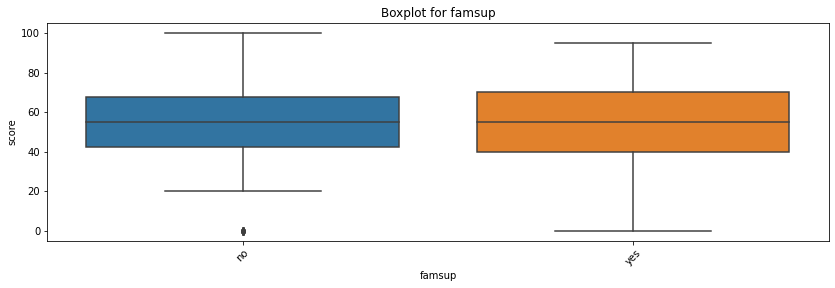

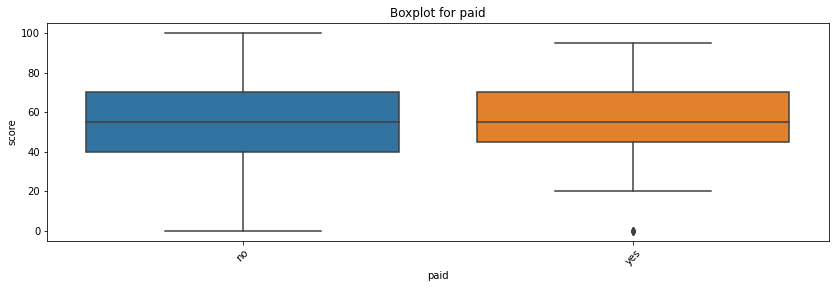

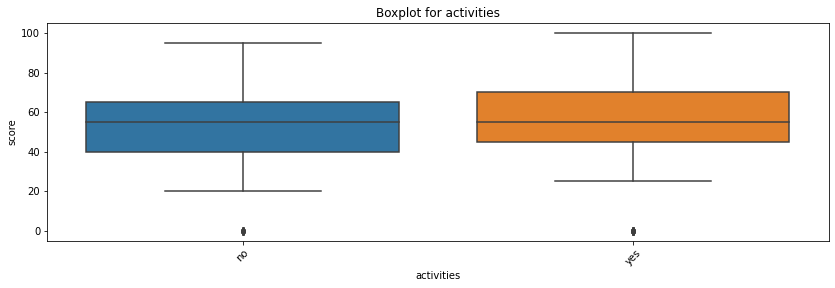

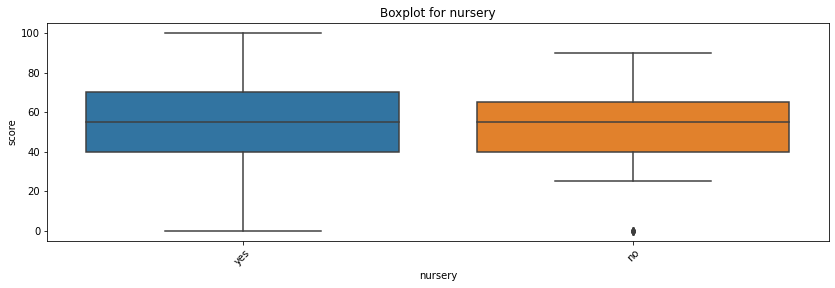

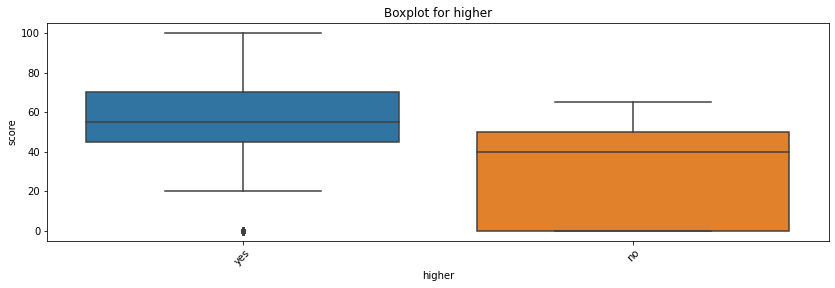

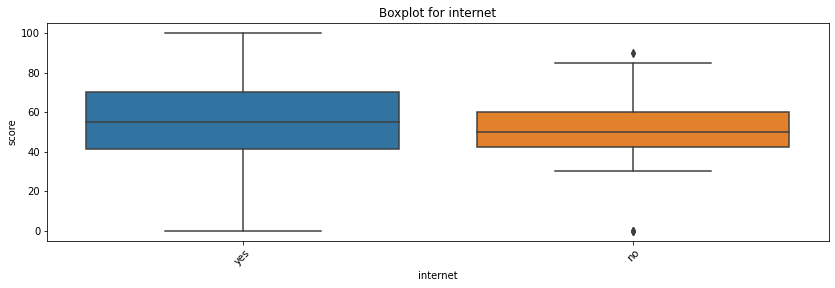

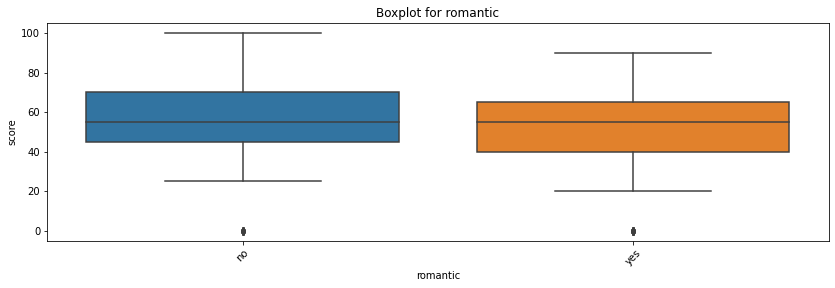

In [84]:
for col in ['address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 
            'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)


In [85]:
def get_stat_dif(column):
    cols = students_object.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students_object.loc[students_object.loc[:, column] == comb[0], 'score'], 
                        students_object.loc[students_object.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.1/len(combinations_all): # уровень доверия 90%
            print('Найдены статистически значимые различия для колонки', column)
            break